In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

In [3]:
def dmu_idm_dr(T_rec, A_rec, z, case='recoupling', a_idm_dr=1, nindex_idm_dr=4, omega0_cdm=0.12038, f_idm_dr=1.0, h=0.67556, xi=0.3):
    """
    Calculate the comoving scattering rate for a given T_rec, A_rec, z.
    """
    base_rate = (a_idm_dr * ((1+z)/(1e7))**nindex_idm_dr * omega0_cdm*f_idm_dr * h**2)
    T_idr = 2.7255 * xi

    if case == 'recoupling':
        if T_rec > T_idr * (1+z):
            return base_rate * (1 + A_rec)
            
    return base_rate

def single_decoupling_z(a_idm_dr, nindex_idm_dr=4, omega0_cdm=0.12038, f_idm_dr=1.0, h=0.67556):
    """
    Calculate the redshift at which dmu_idm_dr = 1e-3 for a given a_idm_dr for single decoupling.
    """
    return -1 + ((10**(7*nindex_idm_dr - 3))/(a_idm_dr * f_idm_dr*h**2 * omega0_cdm))**(1/nindex_idm_dr)

In [4]:
#Load pk interpolations from pickle file
pk_sd_interp = pickle.load(open('interps/pks_sd_interp.p','rb'))
pk_dd_interp = pickle.load(open('interps/pks_dd_interp.p','rb'))

In [5]:
#range of k's for which pk interpolations are valid
pk_max = 1e2
kk = np.logspace(-4, np.log10(pk_max), 500)

N_points = 100
#Values over which dd interpolation is defined
T_rec_arr = np.logspace(5, 7, N_points)
A_rec_arr = np.logspace(-1, 3, N_points)

In [6]:
#plot interpolation between two scenarios
idx = 65

print('Showing interpolation between points with A_rec = %.2f, T_rec = %.2f and A_rec = %.2f, T_rec = %.2f' % (A_rec_arr[idx], T_rec_arr[idx], A_rec_arr[idx+1], T_rec_arr[idx+1]))

num_interps = 7
T_interps = np.logspace(np.log10(T_rec_arr[idx]), np.log10(T_rec_arr[idx+1]), num_interps)
A_interps = np.logspace(np.log10(A_rec_arr[idx]), np.log10(A_rec_arr[idx+1]), num_interps)

zs = np.logspace(5,8,1000)
dmus1 = [dmu_idm_dr(T_rec_arr[idx], A_rec_arr[idx], z) for z in zs] 
dmus2 = [dmu_idm_dr(T_rec_arr[idx+1], A_rec_arr[idx+1], z) for z in zs] 


Showing interpolation between points with A_rec = 42.29, T_rec = 2056512.31 and A_rec = 46.42, T_rec = 2154434.69


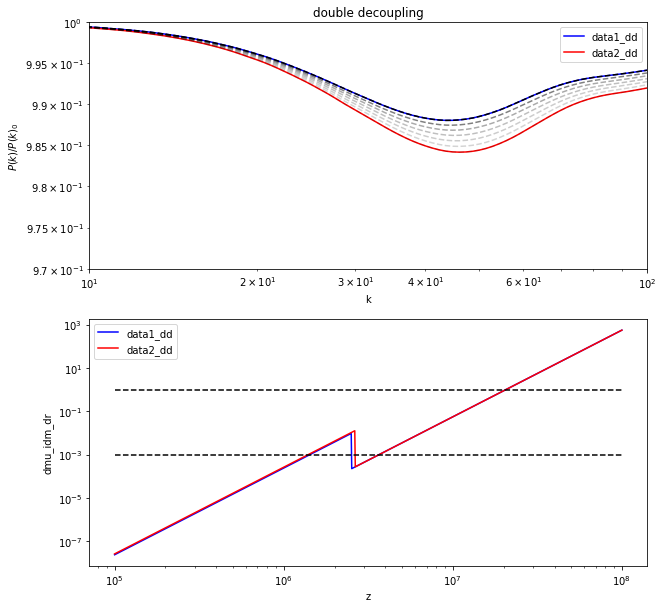

In [7]:
plt.figure(1, figsize=(10,10))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='data1_dd')
plt.plot(kk, pk_dd_interp((T_rec_arr[idx+1], A_rec_arr[idx+1], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'r', label='data2_dd')
for num_interp in range(num_interps):
    plt.plot(kk, pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k')
plt.ylabel('$P(k)/P(k)_0$')
plt.legend()
plt.title('double decoupling')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('dmu_idm_dr')
plt.plot(zs, dmus1, 'b', label='data1_dd')
plt.plot(zs, dmus2, 'r', label='data2_dd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
plt.legend()
plt.show()

## Single Decoupling

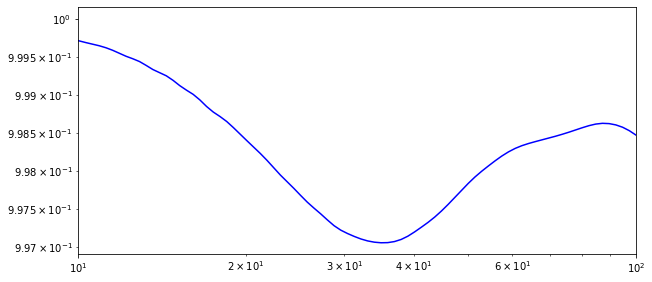

In [8]:
plt.figure(1, figsize=(10,10))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[60], A_rec_arr[60], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='data1_dd')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.show()

In [9]:
N_points_a = 50
#Values over which sd interpolation is defined
a_idm_dr_arr = np.logspace(-5, 5, N_points_a)

In [10]:
idx_a = 30

print('Showing interpolation between points with a_idm_dr = %.2f (z_decoupling = %.2e) and a_idm_dr = %.2f (z_decoupling = %.2e)' % (a_idm_dr_arr[idx_a],single_decoupling_z(a_idm_dr_arr[idx_a]), a_idm_dr_arr[idx_a+1], single_decoupling_z(a_idm_dr_arr[idx_a+1])))

num_interps = 7
a_idm_dr_interps = np.logspace(np.log10(a_idm_dr_arr[idx_a]), np.log10(a_idm_dr_arr[idx_a+1]), num_interps)

Showing interpolation between points with a_idm_dr = 13.26 (z_decoupling = 1.92e+06) and a_idm_dr = 21.21 (z_decoupling = 1.71e+06)


In [11]:
#plot scattering rate for those two scenarios
zs = np.logspace(5,8,1000)
dmus1_sd = [dmu_idm_dr(None, None, z, a_idm_dr = a_idm_dr_arr[idx_a], case='no-rec') for z in zs] 
dmus2_sd = [dmu_idm_dr(None, None, z, a_idm_dr = a_idm_dr_arr[idx_a+1], case='no-rec') for z in zs] 


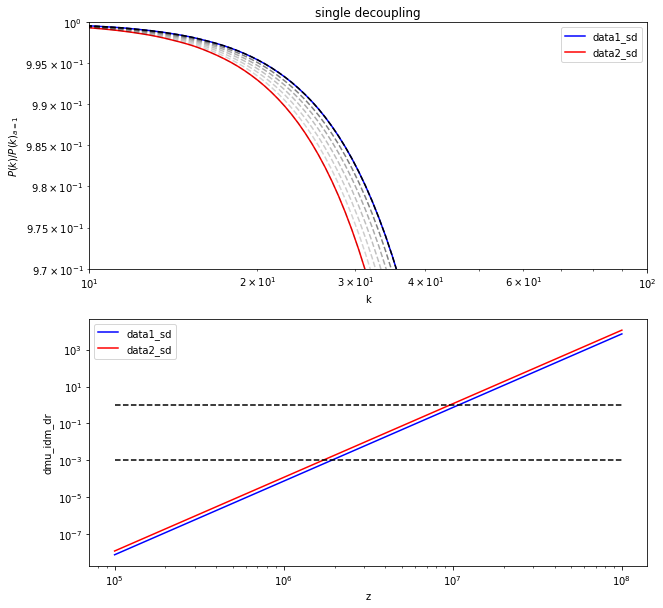

In [12]:
plt.figure(1, figsize=(10,10))
plt.subplot(211)
plt.plot(kk, pk_sd_interp((a_idm_dr_arr[idx_a], kk))/pk_sd_interp((1,kk)),'b', label='data1_sd')
plt.plot(kk, pk_sd_interp((a_idm_dr_arr[idx_a+1], kk))/pk_sd_interp((1,kk)),'r', label='data2_sd')
for num_interp in range(num_interps):
    plt.plot(kk, pk_sd_interp((a_idm_dr_interps[num_interp], kk))/pk_sd_interp((1,kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k')
plt.ylabel('$P(k)/P(k)_{a=1}$')
plt.legend()
plt.title('single decoupling')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('dmu_idm_dr')
plt.plot(zs, dmus1_sd, 'b', label='data1_sd')
plt.plot(zs, dmus2_sd, 'r', label='data2_sd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
plt.show()

## Best fit sd vs dd cases

In [13]:
def best_sd_fit(T_rec, A_rec, a_idm_dr_arr):
    '''
    For a given double decoupling case, finds the best fit a_idm_dr for a single decoupling case using an l2 metric
    #currently ~4.5 secs. Can improve?
    '''
    l2best = np.inf
    l2best_a = 0
    for a in a_idm_dr_arr: #only searching over a_idm_dr values that were defined in the sd interpolation
        l2 = np.sum([(pk_dd_interp((T_rec, A_rec, k)) - pk_sd_interp((a, k)))**2 for k in kk[-200:]]) #Only look at highest k
        if l2 < l2best:
            l2best = l2
            l2best_a = a
    return l2best, l2best_a

In [14]:
best_sd_fit(T_rec_arr[idx], A_rec_arr[idx], a_idm_dr_arr)

(3.2450712448363916e-06, 1.2648552168552958)

In [15]:
#Scan over params
#? This could be very fast on the cluster. Worth doing though?
#todo: parallelize (see script)
T_rec_arr_test = T_rec_arr[50:]
A_rec_arr_test = A_rec_arr[50:]

l2_best_arr = np.zeros((len(T_rec_arr_test), len(A_rec_arr_test)))
best_a_arr = np.zeros((len(T_rec_arr_test), len(A_rec_arr_test)))

for i, T_rec in enumerate(T_rec_arr_test):
    for j, A_rec in enumerate(A_rec_arr_test):
        l2_best_arr[i,j], best_a_arr[i,j] = best_sd_fit(T_rec, A_rec, a_idm_dr_arr)


In [16]:
TT, AA = np.meshgrid(T_rec_arr_test, A_rec_arr_test)

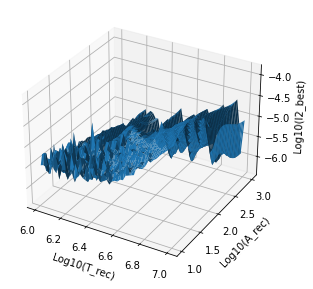

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(TT), np.log10(AA), np.log10(l2_best_arr))
ax.set_xlabel('Log10(T_rec)')
ax.set_ylabel('Log10(A_rec)')
ax.set_zlabel('Log10(l2_best)')

fig.tight_layout()
plt.show()

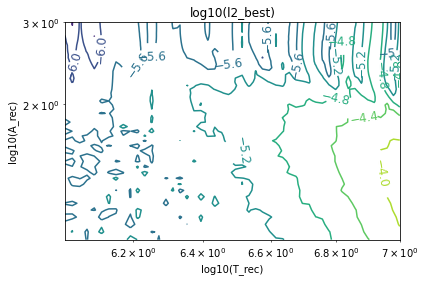

In [21]:
fig, ax = plt.subplots()
CS = ax.contour(np.log10(T_rec_arr_test), np.log10(A_rec_arr_test), np.log10(l2_best_arr))
ax.clabel(CS, inline=True, fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log10(T_rec)')
ax.set_ylabel('log10(A_rec)')
ax.set_title('log10(l2_best)')
plt.show()

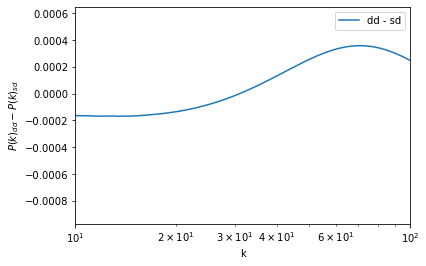

In [28]:
idx_test = 28
plt.plot(kk[-200:], (pk_dd_interp((T_rec_arr_test[idx_test], A_rec_arr_test[idx_test], kk[-200:])) - pk_sd_interp((best_a_arr[idx_test, idx_test], kk[-200:]))), label='dd - sd')
plt.xscale('log')
plt.xlim(1e1,1e2)
plt.xlabel('k')
plt.ylabel('$P(k)_{dd} - P(k)_{sd}$')
plt.legend()
plt.show()

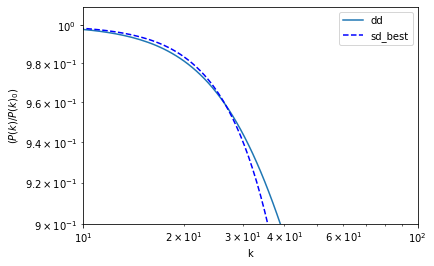

In [359]:
idx_test = 25
plt.plot(kk[-200:], pk_dd_interp((T_rec_arr_test[idx_test], A_rec_arr_test[idx_test], kk[-200:]))/pk_sd_interp((a_idm_dr_arr[0], kk[-200:])), label='dd')
# plt.plot(kk, pk_sd_interp((a_idm_dr_arr[l2best_idx_a], kk))/pk_sd_interp((a_idm_dr_arr[0], kk)),'b--', label='sd_best')
plt.plot(kk[-200:], pk_sd_interp((best_a_arr[idx_test, idx_test], kk[-200:]))/pk_sd_interp((a_idm_dr_arr[0], kk[-200:])),'b--', label='sd_best')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('$(P(k)/ P(k)_0)$')
plt.ylim(0.9,1.01)
plt.xlim(1e1,1e2)
plt.legend()
plt.show()

## Load and plot DESY1+BOSS data

In [51]:
columns = ["k", "P(k)", "delta P(k)+", "delta P(k)-"]
df = pd.read_csv("DESBOSS.csv", header=None)
df.columns = columns
yerr = np.array([df["delta P(k)-"], df['delta P(k)+']])

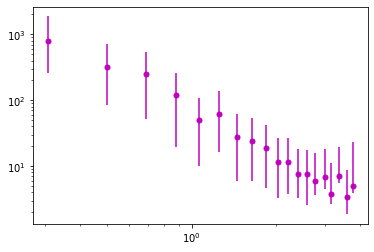

In [100]:
plt.errorbar(df['k'], df['P(k)'], yerr, marker='o', ms=5, color='m', ls='none')
plt.xscale('log')
plt.yscale('log')

(0.1, 10)

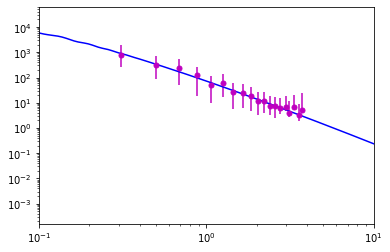

In [101]:
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx], kk)),'b', label='data1_dd')
plt.errorbar(df['k'], df['P(k)'], yerr, marker='o', ms=5, color='m', ls='none')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,10)

chi-square best fit b/w sd and dd cases? 

best fitting sd vs dd for real data?

l2 distance? Integrate difference b/w curves

Best fit to CMB data